
Statistical Summary:
       Temperature  Humidity    Rainfall
count    10.000000    10.000   10.000000
mean     29.040000    72.300  857.500000
std       0.911897     3.335   40.362937
min      27.500000    67.000  790.000000
25%      28.400000    70.250  826.250000
50%      29.100000    72.500  865.000000
75%      29.625000    74.750  887.500000
max      30.400000    77.000  910.000000


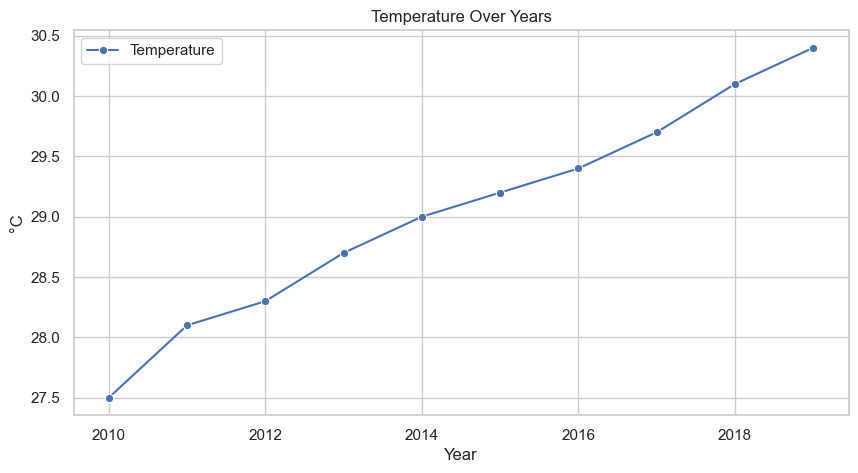

C:\Users\mohan\AppData\Local\Temp\ipykernel_18224\601871585.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Rainfall', data=df, palette='Blues', errorbar=None)


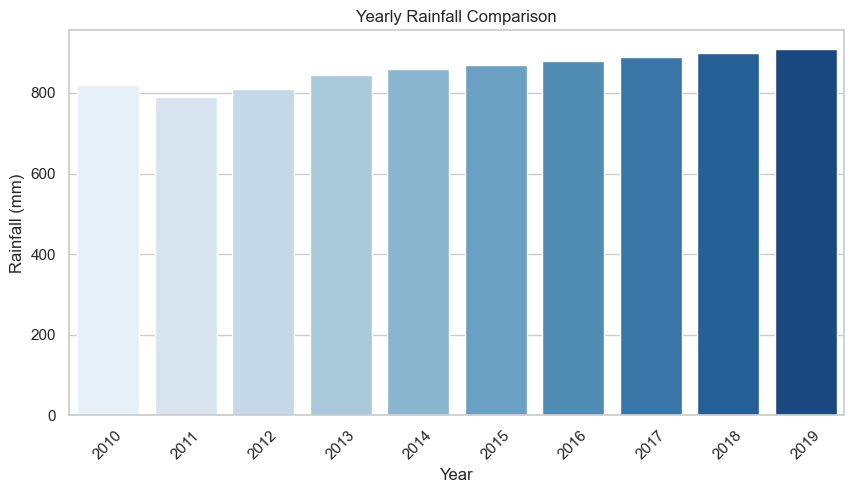

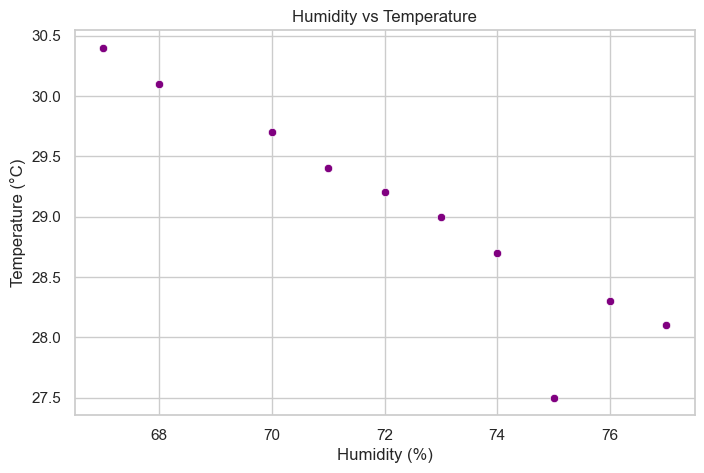

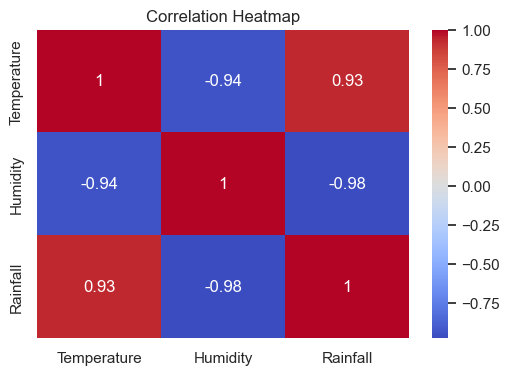


Model Accuracy:
MSE = 0.01, RMSE = 0.09


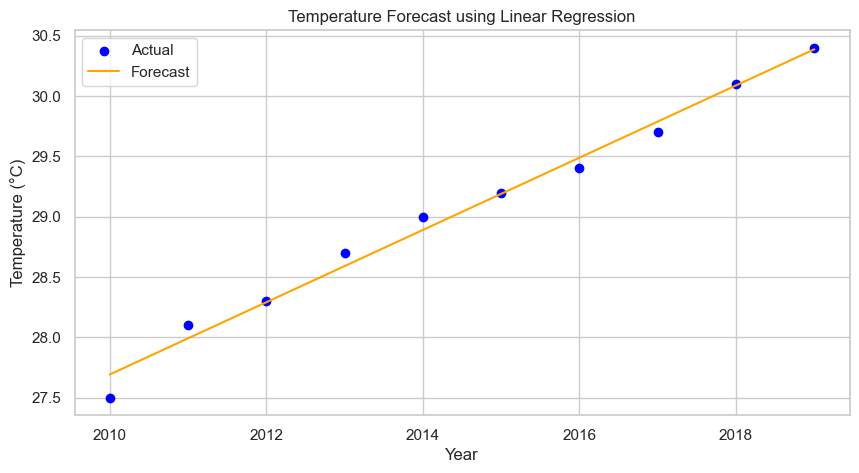

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# --- Sample Weather Data ---
df = pd.read_csv("Book1.csv")
df = pd.DataFrame(data)

# --- Preprocessing ---
df['Year'] = df['Date'].dt.year
df.fillna(df.mean(numeric_only=True), inplace=True)

# Normalize Temperature (optional for ML use)
df['Temp_norm'] = (df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std()

# --- Statistical Summary ---
print("\nStatistical Summary:")
print(df[['Temperature', 'Humidity', 'Rainfall']].describe())

# --- Visualizations ---
sns.set(style='whitegrid')

# Line Chart: Temperature over Years
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Temperature', data=df, marker='o', label='Temperature')
plt.title("Temperature Over Years")
plt.ylabel("°C")
plt.xlabel("Year")
plt.legend()
plt.show()

# Bar Graph: Yearly Rainfall
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Rainfall', data=df, palette='Blues', errorbar=None)
plt.title("Yearly Rainfall Comparison")
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

# Scatter Plot: Humidity vs Temperature
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Humidity', y='Temperature', data=df, color='purple')
plt.title("Humidity vs Temperature")
plt.xlabel("Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()

# Heatmap: Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Temperature', 'Humidity', 'Rainfall']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# --- Linear Regression Forecast ---
X = df[['Year']]
y = df['Temperature']

model = LinearRegression()
model.fit(X, y)
df['Predicted_Temp'] = model.predict(X)

# Accuracy Metrics
mse = mean_squared_error(y, df['Predicted_Temp'])
rmse = np.sqrt(mse)
print(f"\nModel Accuracy:\nMSE = {mse:.2f}, RMSE = {rmse:.2f}")

# Forecasting Graph
plt.figure(figsize=(10, 5))
plt.scatter(df['Year'], df['Temperature'], color='blue', label='Actual')
plt.plot(df['Year'], df['Predicted_Temp'], color='orange', label='Forecast')
plt.title("Temperature Forecast using Linear Regression")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()